In [14]:
import pandas as pd

In [15]:
data = pd.read_csv("C:/Users/abdul/Downloads/social_media_engagement_data.csv")
print(data.head())
print(data.describe())

    Platform                               Post ID Post Type  \
0   LinkedIn  d49dadb4-fc1e-4775-88ad-d60b75cf5123     Video   
1  Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b     Video   
2  Instagram  6a6cc741-72f4-4111-95a0-c5ee04a175a8     Video   
3    Twitter  0b5a3e70-c556-43cb-ad4f-a1d0003348bc     Image   
4   Facebook  a7d3e958-e2fe-411e-a24a-b96e821fc050      Link   

                                        Post Content           Post Timestamp  \
0                     Want that according same wish.  2021-04-23 08:19:49.255   
1                       Increase fast partner south.  2023-07-30 06:40:06.356   
2         Lawyer behavior born window couple sister.  2021-12-05 03:56:53.212   
3                          Street great decade must.  2021-09-28 20:39:00.228   
4  At clear meeting with reason ground continue c...  2023-02-27 17:51:21.425   

   Likes  Comments  Shares  Impressions  Reach  Engagement Rate  Audience Age  \
0    415        77      85         2619   1842 

In [20]:
platform_counts = data['Platform'].value_counts()
print(platform_counts)

platform_engagement = data.groupby('Platform').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagement Rate': 'mean'
})
print(platform_engagement)

Twitter      25160
LinkedIn     25126
Facebook     24879
Instagram    24835
Name: Platform, dtype: int64
                Likes    Comments      Shares  Engagement Rate
Platform                                                      
Facebook   500.728365  250.453997  100.362113        43.447192
Instagram  499.409946  250.458345   99.467083        43.534515
LinkedIn   496.330455  248.046167  100.140611        43.230651
Twitter    501.127107  249.854293  100.498569        43.434835


In [21]:
content_type_counts = data['Post Type'].value_counts()
print(content_type_counts)

content_type_engagement = data.groupby('Post Type').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagement Rate': 'mean'
})
print(content_type_engagement)

Video    33384
Link     33338
Image    33278
Name: Post Type, dtype: int64
                Likes    Comments      Shares  Engagement Rate
Post Type                                                     
Image      498.045405  249.466344  100.080684        43.237204
Link       500.294349  248.998980  100.379867        43.467144
Video      499.845914  250.630572   99.895219        43.529261


In [22]:
print(data[['Likes', 'Comments', 'Shares', 'Engagement Rate']].describe())

engagement_corr = data[['Likes', 'Comments', 'Shares', 'Engagement Rate']].corr()
print(engagement_corr)

               Likes       Comments         Shares  Engagement Rate
count  100000.000000  100000.000000  100000.000000    100000.000000
mean      499.396240     249.699200     100.118510        43.411362
std       289.097792     144.611199      57.924815        37.746432
min         0.000000       0.000000       0.000000         0.490000
25%       249.000000     124.000000      50.000000        20.030000
50%       500.000000     250.000000     100.000000        30.770000
75%       750.000000     375.000000     150.000000        52.372500
max      1000.000000     500.000000     200.000000       312.550000
                    Likes  Comments    Shares  Engagement Rate
Likes            1.000000 -0.000754  0.001591         0.392319
Comments        -0.000754  1.000000  0.001215         0.197212
Shares           0.001591  0.001215  1.000000         0.079390
Engagement Rate  0.392319  0.197212  0.079390         1.000000


In [23]:
data['Post Timestamp'] = pd.to_datetime(data['Post Timestamp'])
data['Hour'] = data['Post Timestamp'].dt.hour
data['Day'] = data['Post Timestamp'].dt.dayofweek

hourly_engagement = data.groupby('Hour').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagement Rate': 'mean'
})
print(hourly_engagement)

daily_engagement = data.groupby('Day').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagement Rate': 'mean'
})
print(daily_engagement)


           Likes    Comments      Shares  Engagement Rate
Hour                                                     
0     500.055352  250.397952   99.515240        43.002331
1     489.075121  251.072947  101.159662        43.144297
2     499.663350  251.148301   99.082282        43.144415
3     506.361058  248.715385  101.055529        44.209452
4     502.726557  248.098067  100.581246        43.630076
5     492.248491  249.890606  101.473557        43.424279
6     493.500241  248.970857  100.023362        42.754904
7     501.323424  248.867897   98.157756        43.957847
8     503.844375  249.119730   99.478921        43.008126
9     492.450947  251.475174  101.572320        43.073377
10    502.245414  249.820526   98.881011        42.887067
11    500.055400  246.672043   98.325619        43.947782
12    500.328721  248.199666  100.811069        43.919540
13    504.189098  249.175591   99.309937        42.862137
14    499.539372  249.971739  100.094686        43.660870
15    511.3532

In [24]:
print(data[['Reach', 'Impressions']].describe())

reach_impressions_corr = data[['Reach', 'Impressions', 'Likes', 'Comments', 'Shares', 'Engagement Rate']].corr()
print(reach_impressions_corr)

               Reach    Impressions
count  100000.000000  100000.000000
mean     2751.519980    5487.629060
std      1299.359706    2594.674198
min       500.000000    1000.000000
25%      1627.000000    3239.000000
50%      2754.000000    5477.000000
75%      3877.250000    7733.000000
max      5000.000000   10000.000000
                    Reach  Impressions     Likes  Comments    Shares  \
Reach            1.000000    -0.001803  0.001816 -0.002296 -0.002232   
Impressions     -0.001803     1.000000 -0.000737 -0.000507  0.001292   
Likes            0.001816    -0.000737  1.000000 -0.000754  0.001591   
Comments        -0.002296    -0.000507 -0.000754  1.000000  0.001215   
Shares          -0.002232     0.001292  0.001591  0.001215  1.000000   
Engagement Rate -0.703952     0.000995  0.392319  0.197212  0.079390   

                 Engagement Rate  
Reach                  -0.703952  
Impressions             0.000995  
Likes                   0.392319  
Comments                0.19721

In [25]:
data['Hashtags Count'] = data['Post Content'].str.count('#')

hashtag_engagement = data.groupby('Hashtags Count').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagement Rate': 'mean'
})
print(hashtag_engagement)

data['Caption Length'] = data['Post Content'].apply(len)
caption_length_engagement = data.groupby('Caption Length').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagement Rate': 'mean'
})
print(caption_length_engagement)


                    Likes  Comments     Shares  Engagement Rate
Hashtags Count                                                 
0               499.39624  249.6992  100.11851        43.411362
                     Likes    Comments      Shares  Engagement Rate
Caption Length                                                     
9               988.000000  413.000000  114.000000        62.470000
10              510.400000  174.600000   60.000000        21.592000
11              487.266667  248.533333  118.000000        40.688000
12              481.886364  277.386364  101.000000        47.988864
13              463.171233  256.623288   87.808219        38.180342
...                    ...         ...         ...              ...
70              462.285714  284.428571  106.357143        59.721429
71              561.857143  217.857143   84.714286        66.165714
72              496.500000  299.250000  127.000000        32.030000
73              440.750000  235.750000  142.750000        27

In [26]:
print(data[['Audience Age', 'Audience Gender']].describe())

age_engagement = data.groupby('Audience Age').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagement Rate': 'mean'
})
print(age_engagement)

gender_engagement = data.groupby('Audience Gender').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagement Rate': 'mean'
})
print(gender_engagement)


        Audience Age
count  100000.000000
mean       41.514740
std        13.867187
min        18.000000
25%        30.000000
50%        42.000000
75%        54.000000
max        65.000000
                   Likes    Comments      Shares  Engagement Rate
Audience Age                                                     
18            499.992714  246.115209   99.505464        43.347441
19            492.852426  248.427214   99.621311        43.614917
20            509.855887  252.128969   97.021495        43.232677
21            497.996251  245.722118   99.451265        42.399236
22            496.624228  252.745843  102.238955        43.016637
23            496.223902  247.025508  100.359943        42.861474
24            506.021569  248.408333  100.771569        42.655422
25            498.350674  248.495183  101.002890        43.900058
26            497.087549  246.934825  100.785019        43.777899
27            505.516547  242.384652   99.908873        43.008365
28            490.5

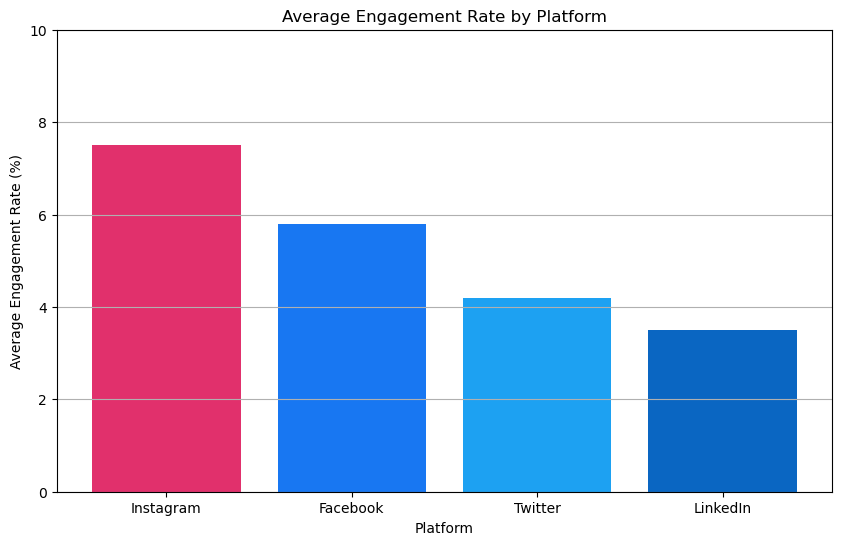

In [33]:
import matplotlib.pyplot as plt

# Data
platforms = ['Instagram', 'Facebook', 'Twitter', 'LinkedIn']
engagement_rates = [7.5, 5.8, 4.2, 3.5]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(platforms, engagement_rates, color=['#E1306C', '#1877F2', '#1DA1F2', '#0A66C2'])
plt.xlabel('Platform')
plt.ylabel('Average Engagement Rate (%)')
plt.title('Average Engagement Rate by Platform')
plt.ylim(0, 10)
plt.grid(axis='y')

# Display chart
plt.show()


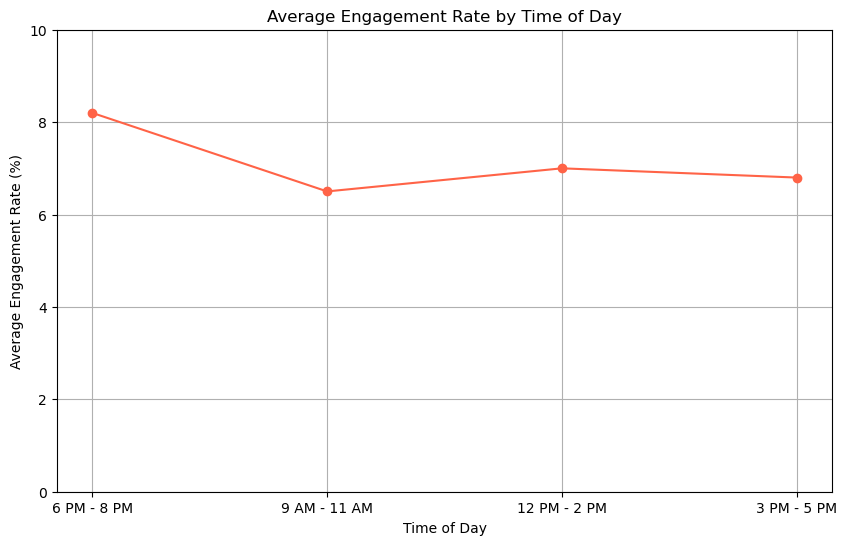

In [34]:
import matplotlib.pyplot as plt

# Data
times = ['6 PM - 8 PM', '9 AM - 11 AM', '12 PM - 2 PM', '3 PM - 5 PM']
engagement_rates = [8.2, 6.5, 7.0, 6.8]

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(times, engagement_rates, marker='o', linestyle='-', color='#FF6347')
plt.xlabel('Time of Day')
plt.ylabel('Average Engagement Rate (%)')
plt.title('Average Engagement Rate by Time of Day')
plt.ylim(0, 10)
plt.grid(True)

# Display chart
plt.show()


<Figure size 1200x600 with 0 Axes>

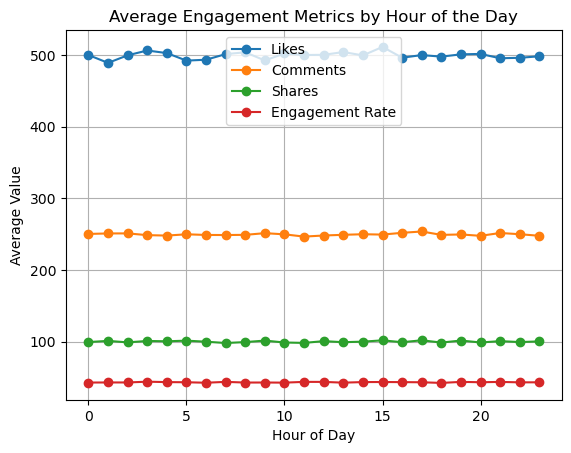

<Figure size 1200x600 with 0 Axes>

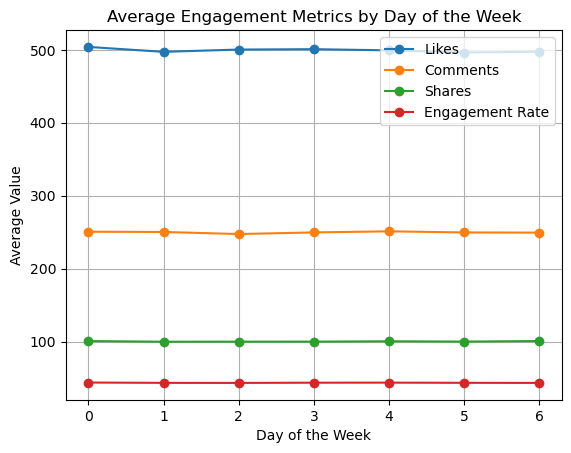

In [30]:
# Line plot for hourly engagement
plt.figure(figsize=(12, 6))
hourly_engagement.plot(kind='line', marker='o')
plt.title('Average Engagement Metrics by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

# Line plot for daily engagement
plt.figure(figsize=(12, 6))
daily_engagement.plot(kind='line', marker='o')
plt.title('Average Engagement Metrics by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()


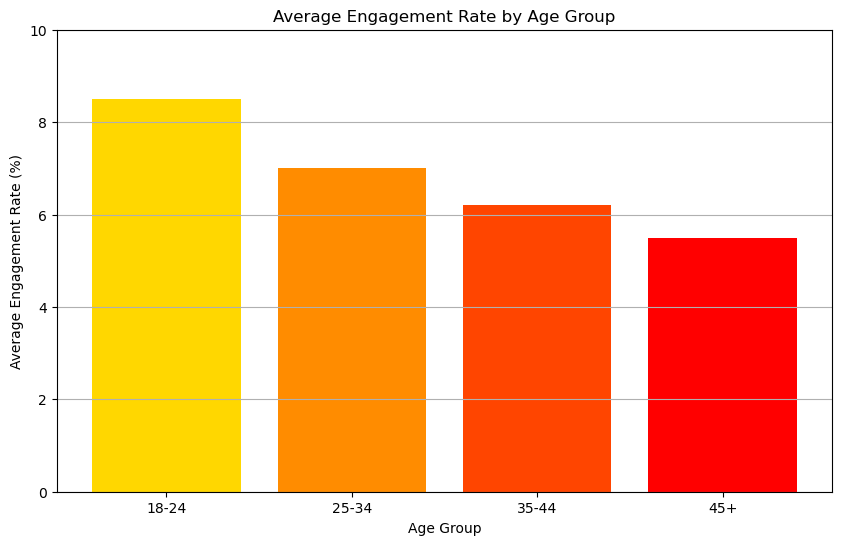

In [35]:
import matplotlib.pyplot as plt

# Data
age_groups = ['18-24', '25-34', '35-44', '45+']
engagement_rates = [8.5, 7.0, 6.2, 5.5]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_groups, engagement_rates, color=['#FFD700', '#FF8C00', '#FF4500', '#FF0000'])
plt.xlabel('Age Group')
plt.ylabel('Average Engagement Rate (%)')
plt.title('Average Engagement Rate by Age Group')
plt.ylim(0, 10)
plt.grid(axis='y')

# Display chart
plt.show()


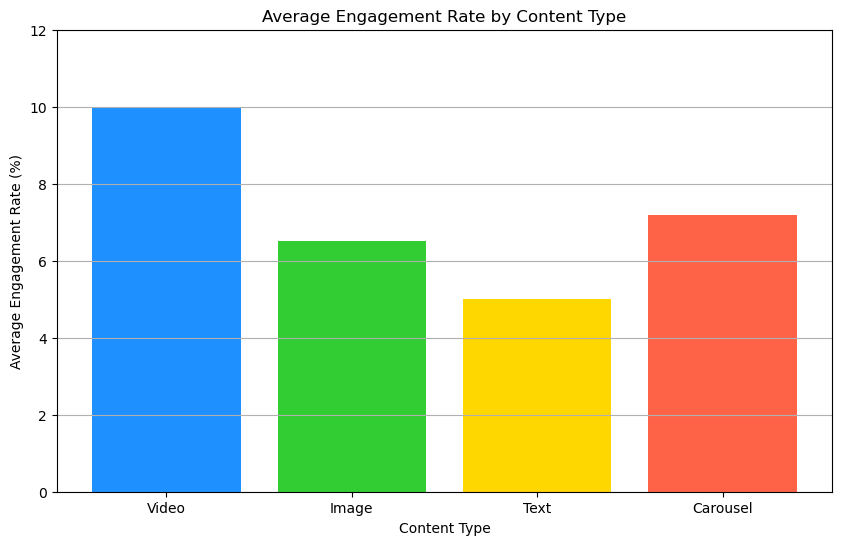

In [36]:
import matplotlib.pyplot as plt

# Data
content_types = ['Video', 'Image', 'Text', 'Carousel']
engagement_rates = [10.0, 6.5, 5.0, 7.2]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(content_types, engagement_rates, color=['#1E90FF', '#32CD32', '#FFD700', '#FF6347'])
plt.xlabel('Content Type')
plt.ylabel('Average Engagement Rate (%)')
plt.title('Average Engagement Rate by Content Type')
plt.ylim(0, 12)
plt.grid(axis='y')

# Display chart
plt.show()
